In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import fftpack
import processing_signals as ps
import padasip as pa

# plt.figure(figsize=(10, 7))

In [2]:
model = np.load("MODEL.NPY")
model_agc = np.load("MODEL_AGC.NPY")
gather = np.load("GATHER.NPY")

print(model.shape, model_agc.shape, gather.shape)

(96, 2001) (96, 2001) (96, 2001)


In [74]:
def normalize(x):
    # print(x.max(axis=1))
    x_mean = x.mean(axis=1)
    x_max = x.max(axis=1)
    for i in range(x.shape[0]):
        x[i] -= x_mean[i]
        x[i] /= x_max[i]
    return x

In [75]:
model = normalize(model)
model_agc = normalize(model_agc)
gather = normalize(gather)

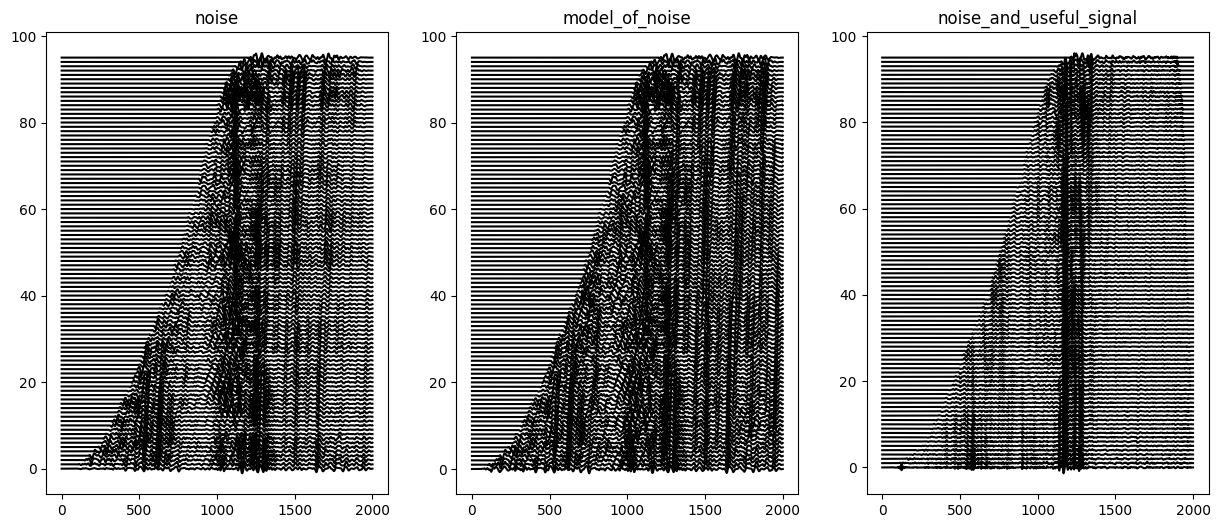

In [90]:
plt.figure(figsize=(15, 6))


shift = 1e+9
plt.subplot(1, 3, 1)
plt.title("noise")
for i in range(96):
    # max_value = np.abs(model[i]).max()
    plt.plot(i + model[i], color='black')

# shift_agc = 1e+5 / 5
shift_agc = shift
plt.subplot(1, 3, 2)
plt.title("model_of_noise")
for i in range(96):
    # max_value = np.abs(model_agc[i]).max()
    plt.plot(i + model_agc[i], color='black')


plt.subplot(1, 3, 3)
plt.title("noise_and_useful_signal")
for i in range(96):
    # max_value = np.abs(gather[i]).max()
    plt.plot(i + gather[i], color='black')

plt.show()

In [77]:
xgrid, tgrid = np.meshgrid(np.arange(2001), np.arange(96))

In [78]:
# ax = plt.axes(projection='3d')
# ax.plot_wireframe(xgrid, tgrid, model)
# # ax.plot(tgrid, xgrid, tempU.reshape((len(np.unique(tempT)), len(np.unique(tempX)))))
# plt.xlabel("ось X")
# plt.ylabel("ось T")
# plt.title("model")
# plt.show()

# Мой LMS метод:

In [79]:
approx_real_weights_1d_lms = ps.fitting_of_LMS(model_agc, gather, 3, 0.00023, 1) #LMS
# print(approx_real_weights_1d_nlms, approx_real_weights_1d_nlms.shape)

In [80]:
approx_real_signal_1d_lms = ps.processing_of_signal(model_agc, approx_real_weights_1d_lms)

# print(f"NMSE = {ps.NMSE(approx_real_signal_1d_lms, model[number_trace]):.1e}")
print(f"MSE = {ps.MSE(approx_real_signal_1d_lms, model):.10e}")
# print(f"NME = {ps.NME(approx_real_signal_1d_lms, model[number_trace]):.1e}")
print(f"MAE = {ps.ME(approx_real_signal_1d_lms, model):.10e}")

(96, 2001) (3, 96)
MSE = 5.0632912666e-02
MAE = 1.3311347365e-01


# Мой NLMS метод:

In [81]:
approx_real_weights_1d_nlms = ps.fitting_of_NLMS(model_agc, gather, 3, 0.00025, 1) #NLMS
# print(approx_real_weights_1d_nlms, approx_real_weights_1d_nlms.shape)

In [82]:
approx_real_signal_1d_nlms = ps.processing_of_signal(model_agc, approx_real_weights_1d_nlms)

# print(f"NMSE = {ps.NMSE(approx_real_signal_1d_nlms, model[number_trace]):.1e}") 
print(f"MSE = {ps.MSE(approx_real_signal_1d_nlms, model):.10e}")
# print(f"NME = {ps.NME(approx_real_signal_1d_nlms, model[number_trace]):.1e}") 
print(f"MAE = {ps.ME(approx_real_signal_1d_nlms, model):.10e}")

(96, 2001) (3, 96)
MSE = 5.0451550633e-02
MAE = 1.3284602761e-01


In [83]:
number_trace = 50

In [84]:
# print(f"MSE = {ps.MSE(approx_real_signal_1d_nlms[number_trace], model[number_trace]):.3e}")
print(f"MAE = {ps.ME(approx_real_signal_1d_nlms[number_trace], model[number_trace]):.3e}")

MAE = 1.464e-01


In [85]:
# print(f"MSE = {ps.MSE(model_agc[number_trace], model[number_trace]):.3e}")
print(f"MAE = {ps.ME(model_agc[number_trace], model[number_trace]):.3e}")

MAE = 3.686e-02


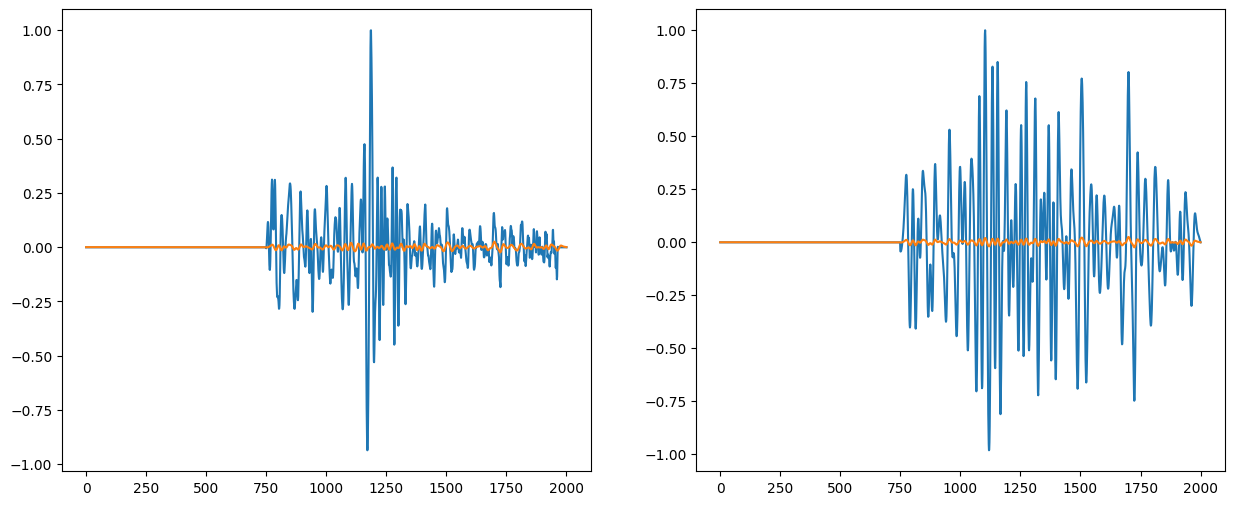

In [86]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(gather[number_trace])
plt.plot(approx_real_signal_1d_nlms[number_trace])

plt.subplot(1, 2, 2)
plt.plot(model[number_trace])
plt.plot(approx_real_signal_1d_nlms[number_trace])


plt.show()

# Мой RLS метод:

In [87]:
approx_real_weights_1d_rls = ps.fitting_of_RLS(model_agc, gather, 3, 0.9908)
# print(approx_real_weights_1d_rls, approx_real_weights_1d_rls.shape)

In [88]:
approx_real_signal_1d_rls = ps.processing_of_signal(model_agc, approx_real_weights_1d_rls)

# print(f"NMSE = {ps.NMSE(approx_real_signal_1d_rls, model[number_trace]):.1e}") 
print(f"MSE = {ps.MSE(approx_real_signal_1d_rls, model):.10e}")
# print(f"NME = {ps.NME(approx_real_signal_1d_rls, model[number_trace]):.1e}") 
print(f"MAE = {ps.ME(approx_real_signal_1d_rls, model):.10e}")

(96, 2001) (3, 96)
MSE = 4.1156791151e-02
MAE = 1.1819554865e-01


In [16]:
number_trace = 50

In [17]:
# print(f"MSE = {ps.MSE(approx_real_signal_1d_rls[number_trace], model[number_trace]):.3e}")
print(f"MAE = {ps.ME(approx_real_signal_1d_rls[number_trace], model[number_trace]):.3e}")

MAE = 2.022e+07


In [18]:
# print(f"MSE = {ps.MSE(model_agc[number_trace], model[number_trace]):.3e}")
print(f"MAE = {ps.ME(model_agc[number_trace], model[number_trace]):.3e}")

MAE = 5.601e+07


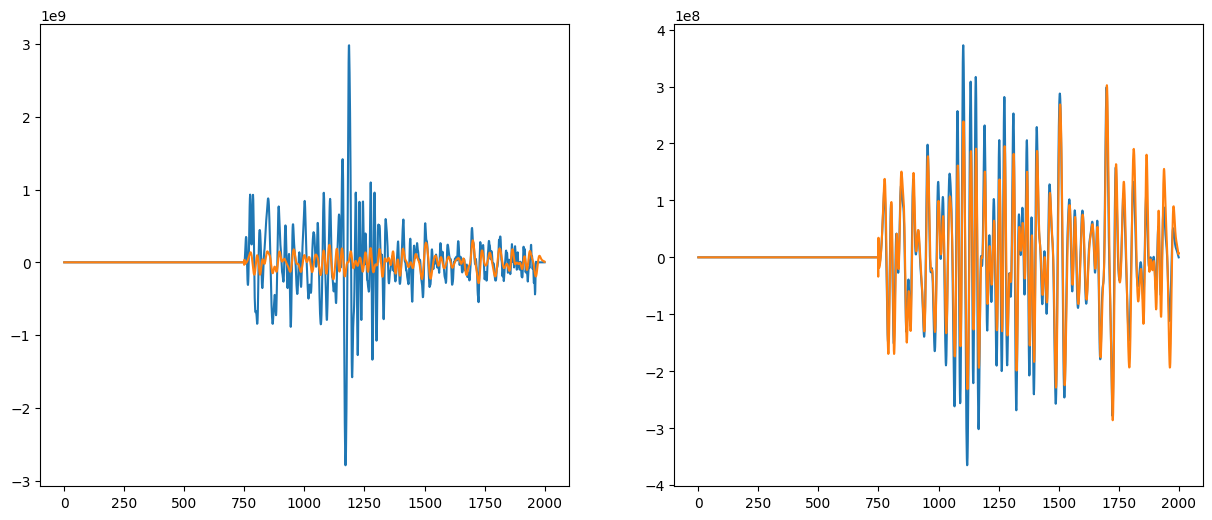

In [19]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(gather[number_trace])
plt.plot(approx_real_signal_1d_rls[number_trace])

plt.subplot(1, 2, 2)
plt.plot(model[number_trace])
plt.plot(approx_real_signal_1d_rls[number_trace])


plt.show()

# Общие выводы

In [20]:
print("My NLMS")
# print(f"MSE = {ps.MSE(approx_real_signal_1d_nlms, model):.3e}")
print(f"MAE = {ps.ME(approx_real_signal_1d_nlms, model):.3e}")
print("My RLS")
# print(f"MSE = {ps.MSE(approx_real_signal_1d_rls, model):.3e}")
print(f"MAE = {ps.ME(approx_real_signal_1d_rls, model):.3e}")
print("All error")
# print(f"MSE = {ps.MSE(np.zeros((96, 2001)), model):.3e}")
# print(f"ME = {ps.ME(np.zeros((96, 2001)), model):.3e}")
# print(f"MSE = {ps.MSE(model_agc, model):.3e}")
print(f"MAE = {ps.ME(model_agc, model):.3e}")

My NLMS
MAE = 2.904e+07
My RLS
MAE = 3.220e+07
All error
MAE = 5.751e+07
